In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Project/PowerPulse/household_power_consumption.txt", delimiter = ";", low_memory = False)

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(2075259, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df.isnull().sum()[df.isnull().sum() > 0]/ len(df) *100

Sub_metering_3    1.251844
dtype: float64

In [8]:
null_values = df[df.isnull().any(axis=1)]
null_values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [9]:
df['Sub_metering_2'].unique()

array(['1.000', '2.000', '0.000', '16.000', '37.000', '36.000', '22.000',
       '12.000', '27.000', '20.000', '9.000', '4.000', '3.000', '5.000',
       '13.000', '35.000', '28.000', '26.000', '24.000', '21.000',
       '17.000', '33.000', '25.000', '23.000', '18.000', '30.000',
       '31.000', '7.000', '38.000', '29.000', '50.000', '71.000',
       '59.000', '62.000', '70.000', '40.000', '34.000', '8.000',
       '15.000', '6.000', '32.000', '19.000', '14.000', '49.000',
       '72.000', '73.000', '61.000', '39.000', '42.000', '10.000',
       '56.000', '11.000', '?', '43.000', '67.000', '63.000', '53.000',
       '65.000', '52.000', '69.000', '48.000', '74.000', '41.000',
       '47.000', '58.000', '68.000', '64.000', '75.000', '46.000',
       '57.000', '60.000', '66.000', '44.000', '78.000', '77.000',
       '76.000', '51.000', '55.000', '45.000', '54.000', '79.000',
       '80.000'], dtype=object)

In [10]:
df.replace('?', np.nan, inplace = True)

In [11]:
col=['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']

In [12]:
for i in col:
    df[i]=df[i].astype('float64')

In [13]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [16]:
# chart & visuvalization part

In [17]:
#Univariant Analysis

Text(0.5, 1.0, 'Global intensity')

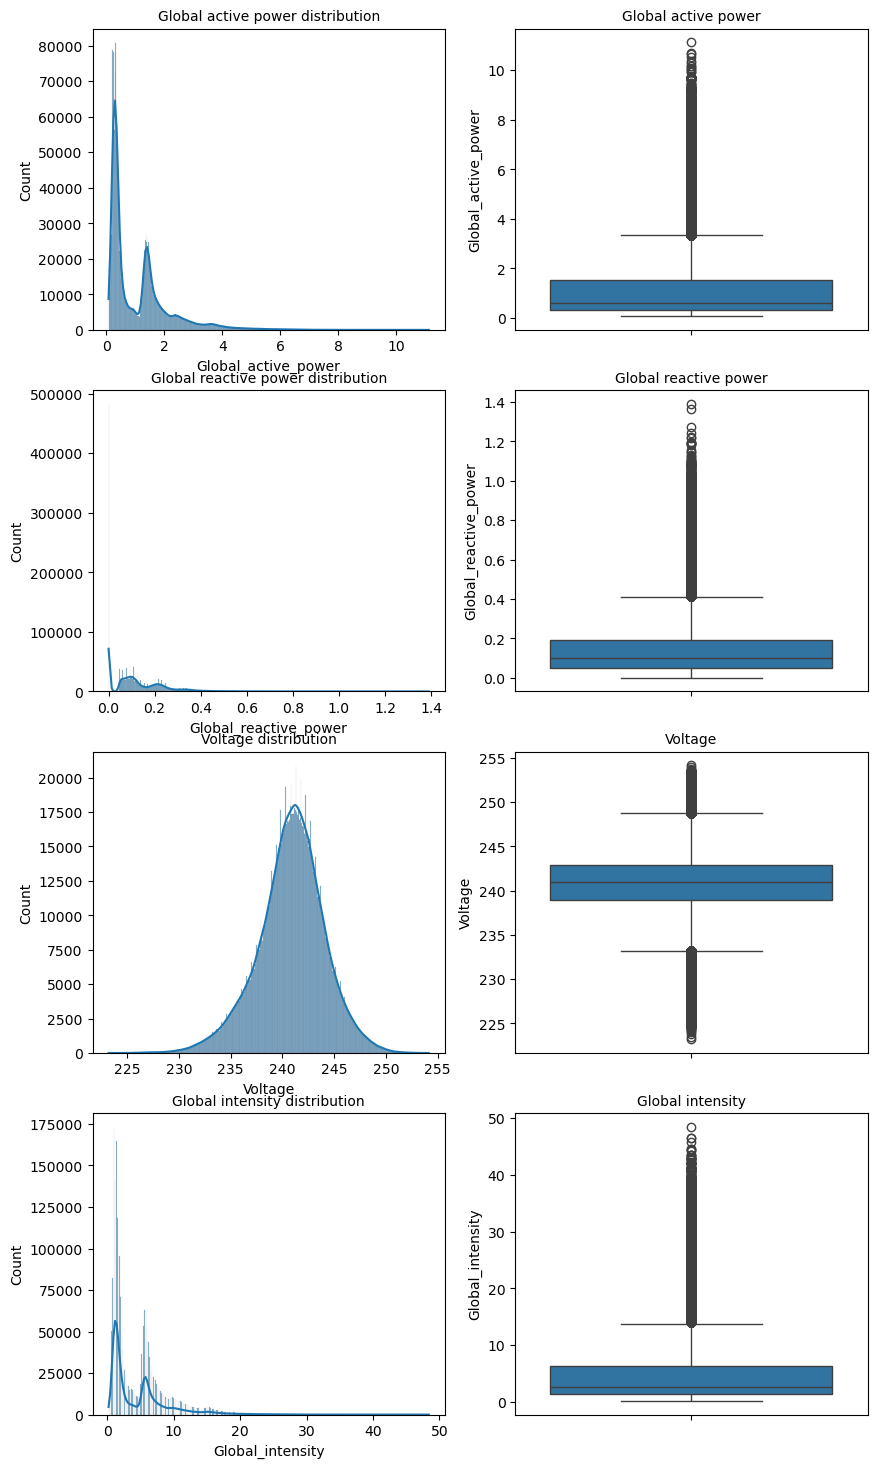

In [18]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,18)

a=sns.histplot(df['Global_active_power'],kde = True, ax=axes[0][0])
a.set_title('Global active power distribution', fontsize=10)

a=sns.boxplot(df['Global_active_power'], ax = axes[0][1])
a.set_title('Global active power', fontsize = 10)

a=sns.histplot(df['Global_reactive_power'],kde = True, ax=axes[1][0])
a.set_title('Global reactive power distribution', fontsize=10)

a=sns.boxplot(df['Global_reactive_power'], ax = axes[1][1])
a.set_title('Global reactive power', fontsize = 10)

a=sns.histplot(df['Voltage'],kde = True, ax=axes[2][0])
a.set_title('Voltage distribution', fontsize=10)

a=sns.boxplot(df['Voltage'], ax = axes[2][1])
a.set_title('Voltage', fontsize = 10)

a=sns.histplot(df['Global_intensity'],kde = True, ax=axes[3][0])
a.set_title('Global intensity distribution', fontsize=10)

a=sns.boxplot(df['Global_intensity'], ax = axes[3][1])
a.set_title('Global intensity', fontsize = 10)

Text(0.5, 1.0, 'sub metering 3')

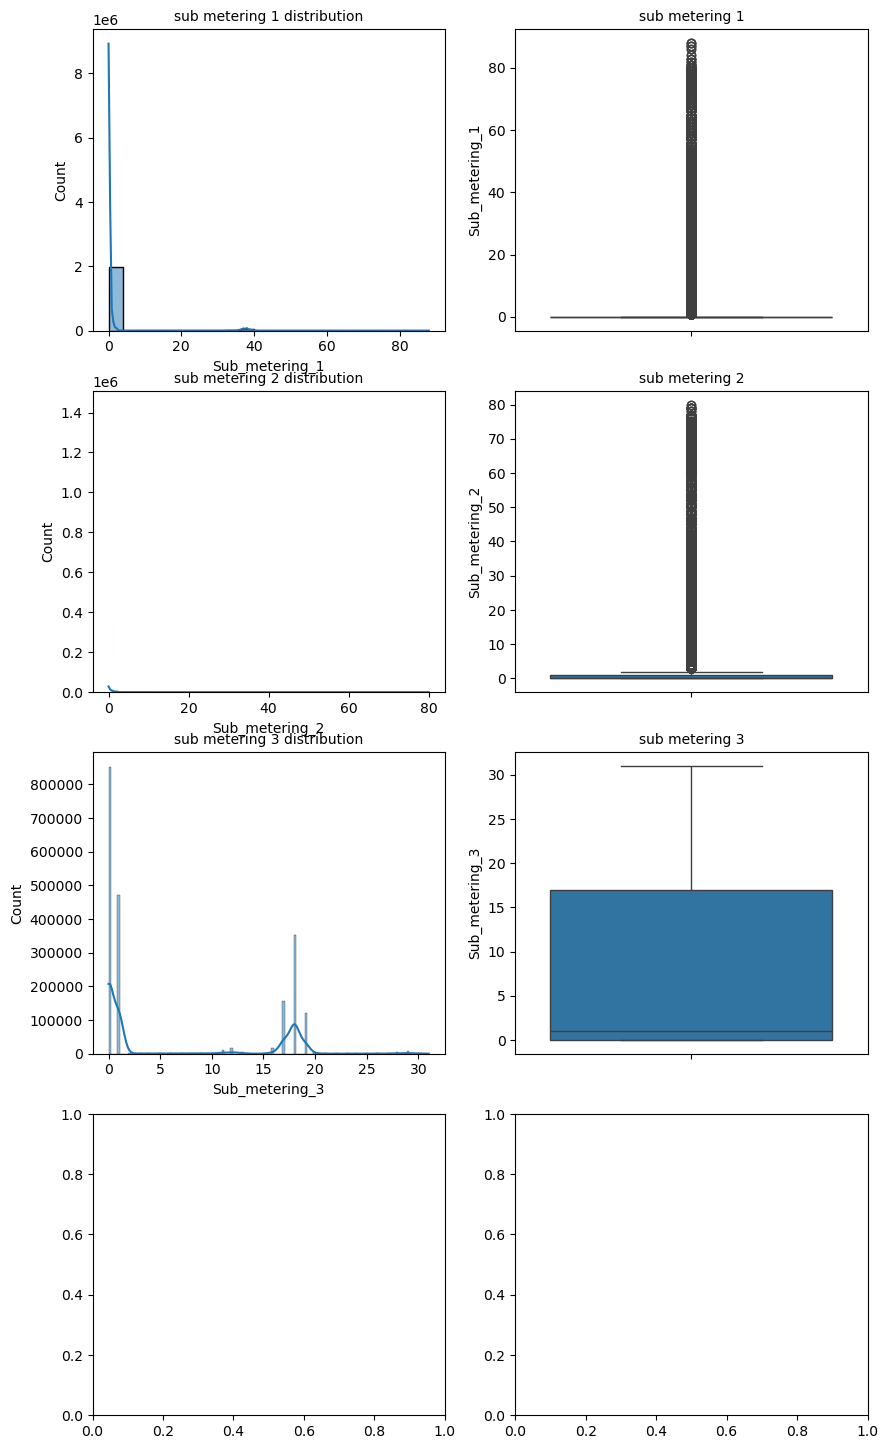

In [20]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,18)

a = sns.histplot(df['Sub_metering_1'], kde = True, ax= axes[0][0])
a.set_title('sub metering 1 distribution', fontsize = 10)

a = sns.boxplot(df['Sub_metering_1'], ax = axes[0][1])
a.set_title('sub metering 1', fontsize = 10)

a = sns.histplot(df['Sub_metering_2'], kde = True, ax= axes[1][0])
a.set_title('sub metering 2 distribution', fontsize = 10)

a = sns.boxplot(df['Sub_metering_2'], ax = axes[1][1])
a.set_title('sub metering 2', fontsize = 10)

a = sns.histplot(df['Sub_metering_3'], kde = True, ax= axes[2][0])
a.set_title('sub metering 3 distribution', fontsize = 10)

a = sns.boxplot(df['Sub_metering_3'], ax = axes[2][1])
a.set_title('sub metering 3', fontsize = 10)


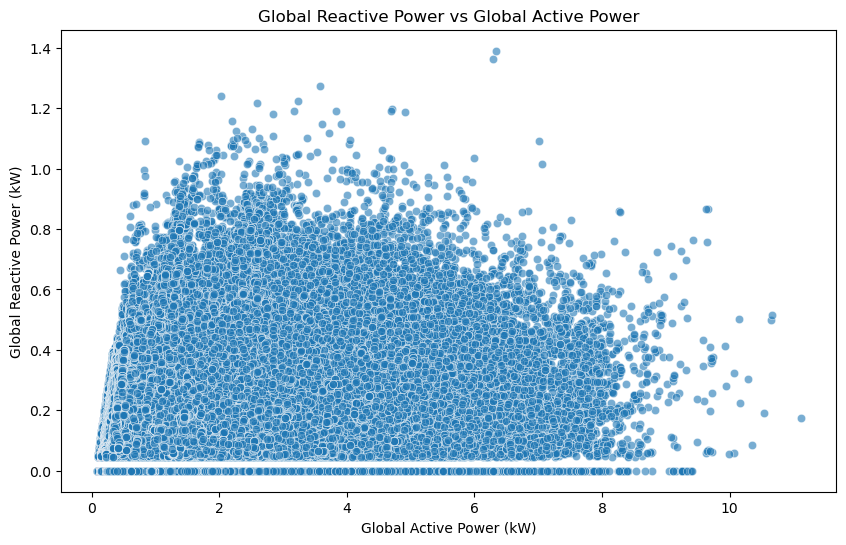

In [21]:
# Scatter Plot with Global_active_power
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Global_active_power'], y=df['Global_reactive_power'], alpha=0.6)
plt.title('Global Reactive Power vs Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Reactive Power (kW)')
plt.show()

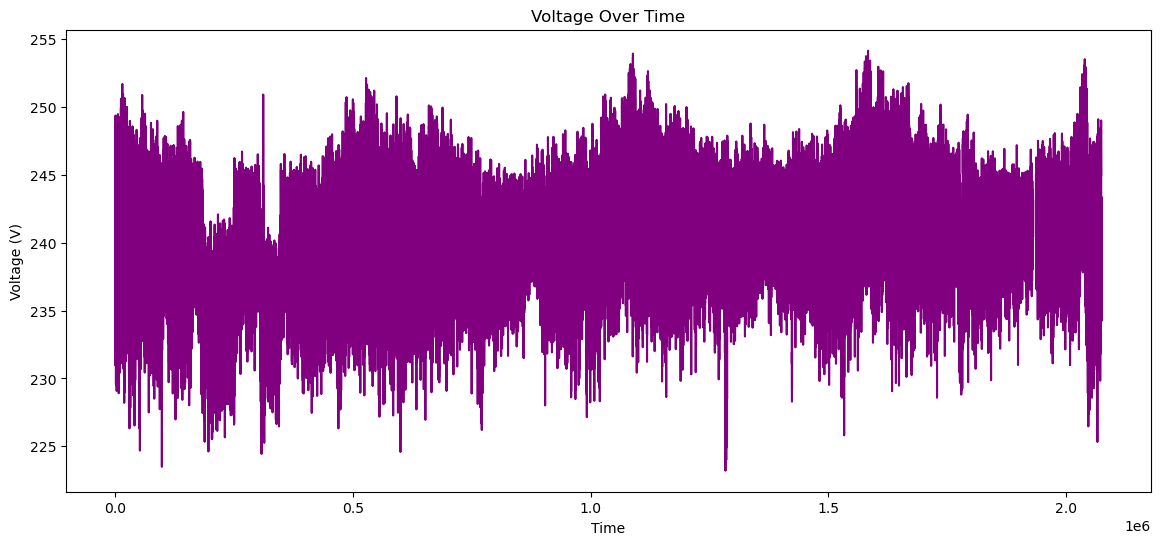

In [22]:
# Line Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Voltage'], color='purple')
plt.title('Voltage Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.show()


In [23]:
df['Sub_metering_2'].value_counts()

Sub_metering_2
0.0     1436830
1.0      378224
2.0      157075
3.0        7189
37.0       6638
         ...   
50.0         32
77.0         24
79.0          8
78.0          3
80.0          2
Name: count, Length: 81, dtype: int64

In [25]:
# date,time & datetime columns also dropped that can't be used in model(we created seperate features)
df= df.drop(df[['Date','Time']], axis = 1) 

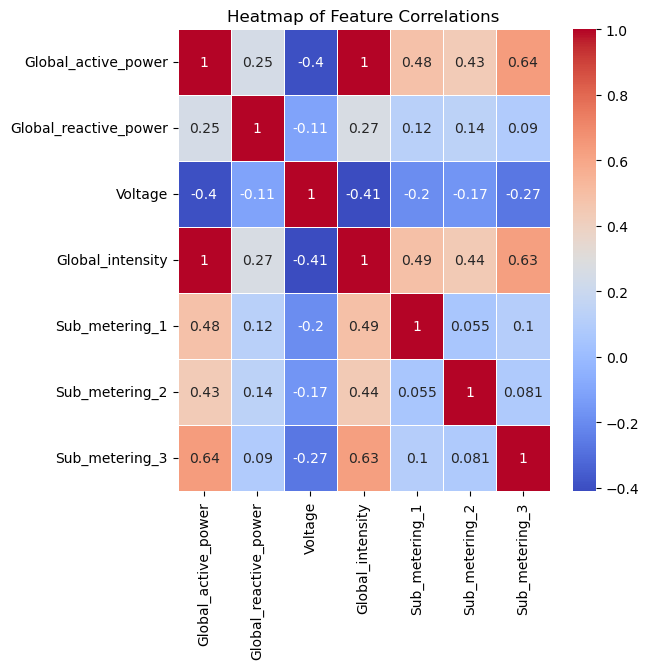

In [28]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), annot =True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()